This jupyter-notebook has be created with 'jupytext'.

Use this [Link](https://colab.research.google.com/github/magnumnp/magnumnp_demos/blob/main/slonczewski2.ipynb) to directly open the Notebook in Google Colab.

## Install magnum.np and fetch reference data (required for Colab)

In [1]:
!pip install -q triton magnumnp
from os import path
if not path.isdir("ref"):
    !mkdir ref
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/slonczewski2/ref/m.dat &> /dev/null

# Slonczewski STT Demo 2

Example 2 taken from the Mumax3 Website (https://mumax.github.io/examples.html)
Flipping the magnetization of a elliptical nanodisk with Slonczewski STT.
Implemented by Jed Cheng (jed.cheng@mag.ed.kyushu-u.ac.jp)

## Run Simulation

In [2]:
from magnumnp import *
import torch
import numpy as np
import pathlib
from tqdm import tqdm

set_log_level(25) # show info_green, but hide info_blue
Timer.enable()
try:
    this_dir = pathlib.Path(__file__).resolve().parent
except:
    this_dir = pathlib.Path().resolve()

# initialize state
dt = 5e-12
n = (64, 32, 1)
dx = (2.5e-9, 2.5e-9, 5e-9)
L = (n[0]*dx[0], n[1]*dx[1], n[2]*dx[2])
origin = (-L[0]/2., -L[1]/2., -L[2]/2.)
mesh = Mesh(n, dx, origin = origin)
state = State(mesh)

state.material = {
    "Ms": 8e5,
    "A": 1.3e-11,
    "alpha": 0.01,
    "P": 0.5669,
    "Lambda": 1,
    "epsilon_prime": 0,
    "mp": [np.cos(np.radians(20)), np.sin(np.radians(20)), 0],
    "d": L[2],
    "J": -8e11,
    }

x, y, z = mesh.SpatialCoordinate()
disk = (x/80e-9)**2 + (y/40e-9)**2 < 1
write_vti(disk, "data/domain.vti")

state.m = state.Constant([0.,0.,0.])
state.m[disk] = torch.tensor([1.,0.,0.])

# initialize field terms
demag    = DemagField()
exchange = ExchangeField()
torque   = SpinTorqueSlonczewski()

# perform integration with spin torque
m_disk = lambda state: state.m[disk] # only consider disk region
llg = LLGSolver([demag, exchange, torque])
logger = Logger(this_dir / "data", ['t', 'm', m_disk], ["m"], fields_every = 10)

for i in tqdm(torch.arange(0, 1e-9, dt)):
    llg.step(state, dt)
    logger << state

Timer.print_report()

2025-03-19 09:54:30  magnum.np:INFO magnum.np 2.0.2 (/usr/local/lib/python3.10/site-packages/ipykernel_launcher.py -f /tmp/tmp85h1ou59.json --HistoryManager.hist_file=:memory:)


2025-03-19 09:54:30  magnum.np:INFO [State] running on device: cpu (dtype = float64)


2025-03-19 09:54:30  magnum.np:INFO [Mesh] 64x32x1 (dx= 2.5e-09 x 2.5e-09 x 5e-09)


2025-03-19 09:54:30  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)


  0%|          | 0/201 [00:00<?, ?it/s]

  0%|          | 1/201 [00:05<18:42,  5.61s/it]

  1%|          | 2/201 [00:05<08:02,  2.42s/it]

  1%|▏         | 3/201 [00:05<04:35,  1.39s/it]

  2%|▏         | 4/201 [00:06<02:58,  1.10it/s]

  2%|▏         | 5/201 [00:06<02:04,  1.57it/s]

  3%|▎         | 6/201 [00:06<01:31,  2.14it/s]

  3%|▎         | 7/201 [00:06<01:09,  2.77it/s]

  4%|▍         | 8/201 [00:06<00:55,  3.45it/s]

  4%|▍         | 9/201 [00:06<00:46,  4.11it/s]

  5%|▍         | 10/201 [00:06<00:40,  4.77it/s]

  5%|▌         | 11/201 [00:07<00:34,  5.44it/s]

  6%|▌         | 12/201 [00:07<00:31,  6.07it/s]

  6%|▋         | 13/201 [00:07<00:28,  6.63it/s]

  7%|▋         | 14/201 [00:07<00:25,  7.20it/s]

  7%|▋         | 15/201 [00:07<00:23,  7.82it/s]

  8%|▊         | 16/201 [00:07<00:22,  8.34it/s]

  8%|▊         | 17/201 [00:07<00:22,  8.33it/s]

  9%|▉         | 18/201 [00:07<00:21,  8.34it/s]

  9%|▉         | 19/201 [00:08<00:22,  8.18it/s]

 10%|▉         | 20/201 [00:08<00:22,  8.22it/s]

 10%|█         | 21/201 [00:08<00:22,  8.05it/s]

 11%|█         | 22/201 [00:08<00:22,  7.95it/s]

 11%|█▏        | 23/201 [00:08<00:22,  8.06it/s]

 12%|█▏        | 24/201 [00:08<00:22,  8.04it/s]

 12%|█▏        | 25/201 [00:08<00:22,  7.94it/s]

 13%|█▎        | 26/201 [00:08<00:22,  7.90it/s]

 13%|█▎        | 27/201 [00:09<00:22,  7.62it/s]

 14%|█▍        | 28/201 [00:09<00:23,  7.44it/s]

 14%|█▍        | 29/201 [00:09<00:22,  7.48it/s]

 15%|█▍        | 30/201 [00:09<00:22,  7.48it/s]

 15%|█▌        | 31/201 [00:09<00:23,  7.32it/s]

 16%|█▌        | 32/201 [00:09<00:23,  7.12it/s]

 16%|█▋        | 33/201 [00:09<00:23,  7.23it/s]

 17%|█▋        | 34/201 [00:10<00:23,  7.22it/s]

 17%|█▋        | 35/201 [00:10<00:22,  7.38it/s]

 18%|█▊        | 36/201 [00:10<00:22,  7.45it/s]

 18%|█▊        | 37/201 [00:10<00:22,  7.34it/s]

 19%|█▉        | 38/201 [00:10<00:21,  7.44it/s]

 19%|█▉        | 39/201 [00:10<00:21,  7.49it/s]

 20%|█▉        | 40/201 [00:10<00:20,  7.70it/s]

 20%|██        | 41/201 [00:10<00:20,  7.66it/s]

 21%|██        | 42/201 [00:11<00:20,  7.76it/s]

 21%|██▏       | 43/201 [00:11<00:19,  7.90it/s]

 22%|██▏       | 44/201 [00:11<00:20,  7.84it/s]

 22%|██▏       | 45/201 [00:11<00:19,  7.95it/s]

 23%|██▎       | 46/201 [00:11<00:19,  7.85it/s]

 23%|██▎       | 47/201 [00:11<00:19,  8.03it/s]

 24%|██▍       | 48/201 [00:11<00:19,  7.67it/s]

 24%|██▍       | 49/201 [00:11<00:19,  7.60it/s]

 25%|██▍       | 50/201 [00:12<00:19,  7.57it/s]

 25%|██▌       | 51/201 [00:12<00:19,  7.54it/s]

 26%|██▌       | 52/201 [00:12<00:19,  7.58it/s]

 26%|██▋       | 53/201 [00:12<00:19,  7.61it/s]

 27%|██▋       | 54/201 [00:12<00:19,  7.72it/s]

 27%|██▋       | 55/201 [00:12<00:19,  7.64it/s]

 28%|██▊       | 56/201 [00:12<00:19,  7.58it/s]

 28%|██▊       | 57/201 [00:13<00:19,  7.56it/s]

 29%|██▉       | 58/201 [00:13<00:18,  7.58it/s]

 29%|██▉       | 59/201 [00:13<00:18,  7.76it/s]

 30%|██▉       | 60/201 [00:13<00:18,  7.66it/s]

 30%|███       | 61/201 [00:13<00:18,  7.60it/s]

 31%|███       | 62/201 [00:13<00:18,  7.37it/s]

 31%|███▏      | 63/201 [00:13<00:18,  7.61it/s]

 32%|███▏      | 64/201 [00:13<00:18,  7.61it/s]

 32%|███▏      | 65/201 [00:14<00:18,  7.55it/s]

 33%|███▎      | 66/201 [00:14<00:17,  7.53it/s]

 33%|███▎      | 67/201 [00:14<00:17,  7.54it/s]

 34%|███▍      | 68/201 [00:14<00:17,  7.71it/s]

 34%|███▍      | 69/201 [00:14<00:16,  8.05it/s]

 35%|███▍      | 70/201 [00:14<00:16,  7.74it/s]

 35%|███▌      | 71/201 [00:14<00:16,  7.83it/s]

 36%|███▌      | 72/201 [00:14<00:16,  7.78it/s]

 36%|███▋      | 73/201 [00:15<00:17,  7.51it/s]

 37%|███▋      | 74/201 [00:15<00:16,  7.56it/s]

 37%|███▋      | 75/201 [00:15<00:16,  7.58it/s]

 38%|███▊      | 76/201 [00:15<00:16,  7.64it/s]

 38%|███▊      | 77/201 [00:15<00:16,  7.51it/s]

 39%|███▉      | 78/201 [00:15<00:16,  7.41it/s]

 39%|███▉      | 79/201 [00:15<00:16,  7.51it/s]

 40%|███▉      | 80/201 [00:16<00:16,  7.35it/s]

 40%|████      | 81/201 [00:16<00:16,  7.36it/s]

 41%|████      | 82/201 [00:16<00:16,  7.31it/s]

 41%|████▏     | 83/201 [00:16<00:16,  7.32it/s]

 42%|████▏     | 84/201 [00:16<00:16,  7.30it/s]

 42%|████▏     | 85/201 [00:16<00:15,  7.32it/s]

 43%|████▎     | 86/201 [00:16<00:15,  7.41it/s]

 43%|████▎     | 87/201 [00:16<00:15,  7.50it/s]

 44%|████▍     | 88/201 [00:17<00:15,  7.49it/s]

 44%|████▍     | 89/201 [00:17<00:14,  7.47it/s]

 45%|████▍     | 90/201 [00:17<00:15,  7.40it/s]

 45%|████▌     | 91/201 [00:17<00:15,  7.31it/s]

 46%|████▌     | 92/201 [00:17<00:14,  7.30it/s]

 46%|████▋     | 93/201 [00:17<00:14,  7.38it/s]

 47%|████▋     | 94/201 [00:17<00:14,  7.34it/s]

 47%|████▋     | 95/201 [00:18<00:14,  7.38it/s]

 48%|████▊     | 96/201 [00:18<00:14,  7.47it/s]

 48%|████▊     | 97/201 [00:18<00:13,  7.67it/s]

 49%|████▉     | 98/201 [00:18<00:13,  7.61it/s]

 49%|████▉     | 99/201 [00:18<00:13,  7.48it/s]

 50%|████▉     | 100/201 [00:18<00:13,  7.52it/s]

 50%|█████     | 101/201 [00:18<00:13,  7.51it/s]

 51%|█████     | 102/201 [00:19<00:13,  7.31it/s]

 51%|█████     | 103/201 [00:19<00:13,  7.17it/s]

 52%|█████▏    | 104/201 [00:19<00:13,  7.32it/s]

 52%|█████▏    | 105/201 [00:19<00:12,  7.53it/s]

 53%|█████▎    | 106/201 [00:19<00:12,  7.56it/s]

 53%|█████▎    | 107/201 [00:19<00:12,  7.47it/s]

 54%|█████▎    | 108/201 [00:19<00:12,  7.42it/s]

 54%|█████▍    | 109/201 [00:19<00:12,  7.51it/s]

 55%|█████▍    | 110/201 [00:20<00:12,  7.50it/s]

 55%|█████▌    | 111/201 [00:20<00:12,  7.36it/s]

 56%|█████▌    | 112/201 [00:20<00:12,  7.31it/s]

 56%|█████▌    | 113/201 [00:20<00:12,  7.27it/s]

 57%|█████▋    | 114/201 [00:20<00:11,  7.39it/s]

 57%|█████▋    | 115/201 [00:20<00:11,  7.45it/s]

 58%|█████▊    | 116/201 [00:20<00:11,  7.51it/s]

 58%|█████▊    | 117/201 [00:21<00:10,  7.70it/s]

 59%|█████▊    | 118/201 [00:21<00:10,  7.70it/s]

 59%|█████▉    | 119/201 [00:21<00:10,  7.54it/s]

 60%|█████▉    | 120/201 [00:21<00:10,  7.50it/s]

 60%|██████    | 121/201 [00:21<00:10,  7.31it/s]

 61%|██████    | 122/201 [00:21<00:10,  7.34it/s]

 61%|██████    | 123/201 [00:21<00:10,  7.37it/s]

 62%|██████▏   | 124/201 [00:21<00:10,  7.39it/s]

 62%|██████▏   | 125/201 [00:22<00:09,  7.62it/s]

 63%|██████▎   | 126/201 [00:22<00:09,  7.53it/s]

 63%|██████▎   | 127/201 [00:22<00:09,  7.43it/s]

 64%|██████▎   | 128/201 [00:22<00:09,  7.39it/s]

 64%|██████▍   | 129/201 [00:22<00:09,  7.44it/s]

 65%|██████▍   | 130/201 [00:22<00:09,  7.49it/s]

 65%|██████▌   | 131/201 [00:22<00:09,  7.50it/s]

 66%|██████▌   | 132/201 [00:23<00:09,  7.53it/s]

 66%|██████▌   | 133/201 [00:23<00:09,  7.47it/s]

 67%|██████▋   | 134/201 [00:23<00:08,  7.55it/s]

 67%|██████▋   | 135/201 [00:23<00:08,  7.52it/s]

 68%|██████▊   | 136/201 [00:23<00:08,  7.48it/s]

 68%|██████▊   | 137/201 [00:23<00:08,  7.41it/s]

 69%|██████▊   | 138/201 [00:23<00:08,  7.21it/s]

 69%|██████▉   | 139/201 [00:23<00:08,  7.36it/s]

 70%|██████▉   | 140/201 [00:24<00:08,  7.62it/s]

 70%|███████   | 141/201 [00:24<00:07,  7.72it/s]

 71%|███████   | 142/201 [00:24<00:07,  7.87it/s]

 71%|███████   | 143/201 [00:24<00:07,  7.75it/s]

 72%|███████▏  | 144/201 [00:24<00:07,  7.72it/s]

 72%|███████▏  | 145/201 [00:24<00:07,  7.70it/s]

 73%|███████▎  | 146/201 [00:24<00:07,  7.86it/s]

 73%|███████▎  | 147/201 [00:25<00:06,  7.74it/s]

 74%|███████▎  | 148/201 [00:25<00:06,  8.05it/s]

 74%|███████▍  | 149/201 [00:25<00:06,  8.09it/s]

 75%|███████▍  | 150/201 [00:25<00:06,  8.00it/s]

 75%|███████▌  | 151/201 [00:25<00:06,  7.94it/s]

 76%|███████▌  | 152/201 [00:25<00:06,  7.85it/s]

 76%|███████▌  | 153/201 [00:25<00:06,  7.76it/s]

 77%|███████▋  | 154/201 [00:25<00:06,  7.70it/s]

 77%|███████▋  | 155/201 [00:26<00:06,  7.62it/s]

 78%|███████▊  | 156/201 [00:26<00:05,  7.73it/s]

 78%|███████▊  | 157/201 [00:26<00:05,  7.67it/s]

 79%|███████▊  | 158/201 [00:26<00:05,  7.62it/s]

 79%|███████▉  | 159/201 [00:26<00:05,  7.64it/s]

 80%|███████▉  | 160/201 [00:26<00:05,  7.59it/s]

 80%|████████  | 161/201 [00:26<00:05,  7.56it/s]

 81%|████████  | 162/201 [00:26<00:05,  7.74it/s]

 81%|████████  | 163/201 [00:27<00:04,  7.69it/s]

 82%|████████▏ | 164/201 [00:27<00:04,  7.58it/s]

 82%|████████▏ | 165/201 [00:27<00:04,  7.38it/s]

 83%|████████▎ | 166/201 [00:27<00:04,  7.79it/s]

 83%|████████▎ | 167/201 [00:27<00:04,  7.63it/s]

 84%|████████▎ | 168/201 [00:27<00:04,  7.42it/s]

 84%|████████▍ | 169/201 [00:27<00:04,  7.43it/s]

 85%|████████▍ | 170/201 [00:28<00:04,  7.61it/s]

 85%|████████▌ | 171/201 [00:28<00:04,  7.37it/s]

 86%|████████▌ | 172/201 [00:28<00:03,  7.40it/s]

 86%|████████▌ | 173/201 [00:28<00:03,  7.41it/s]

 87%|████████▋ | 174/201 [00:28<00:03,  7.34it/s]

 87%|████████▋ | 175/201 [00:28<00:03,  7.38it/s]

 88%|████████▊ | 176/201 [00:28<00:03,  7.40it/s]

 88%|████████▊ | 177/201 [00:28<00:03,  7.47it/s]

 89%|████████▊ | 178/201 [00:29<00:03,  7.45it/s]

 89%|████████▉ | 179/201 [00:29<00:02,  7.66it/s]

 90%|████████▉ | 180/201 [00:29<00:02,  7.80it/s]

 90%|█████████ | 181/201 [00:29<00:02,  7.55it/s]

 91%|█████████ | 182/201 [00:29<00:02,  7.59it/s]

 91%|█████████ | 183/201 [00:29<00:02,  7.54it/s]

 92%|█████████▏| 184/201 [00:29<00:02,  7.53it/s]

 92%|█████████▏| 185/201 [00:30<00:02,  7.48it/s]

 93%|█████████▎| 186/201 [00:30<00:01,  7.54it/s]

 93%|█████████▎| 187/201 [00:30<00:01,  7.77it/s]

 94%|█████████▎| 188/201 [00:30<00:01,  7.54it/s]

 94%|█████████▍| 189/201 [00:30<00:01,  7.37it/s]

 95%|█████████▍| 190/201 [00:30<00:01,  7.75it/s]

 95%|█████████▌| 191/201 [00:30<00:01,  7.62it/s]

 96%|█████████▌| 192/201 [00:30<00:01,  7.58it/s]

 96%|█████████▌| 193/201 [00:31<00:01,  7.72it/s]

 97%|█████████▋| 194/201 [00:31<00:00,  7.64it/s]

 97%|█████████▋| 195/201 [00:31<00:00,  7.74it/s]

 98%|█████████▊| 196/201 [00:31<00:00,  7.61it/s]

 98%|█████████▊| 197/201 [00:31<00:00,  7.30it/s]

 99%|█████████▊| 198/201 [00:31<00:00,  7.50it/s]

 99%|█████████▉| 199/201 [00:31<00:00,  7.52it/s]

100%|█████████▉| 200/201 [00:31<00:00,  7.83it/s]

100%|██████████| 201/201 [00:32<00:00,  7.72it/s]

100%|██████████| 201/201 [00:32<00:00,  6.26it/s]


TIMER REPORT
Operation                      No of calls    Avg time [ms]    Total time [s]
---------------------------  -------------  ---------------  ----------------
LLGSolver.step                         201       155.932            31.3423
    DemagField.h                     16884         0.940309         15.8762
    ExchangeField.h                  16884         0.448439          7.57145
    SpinTorqueSlonczewski.h          16884         0.122089          2.06134
---------------------------  -------------  ---------------  ----------------
Total                                                               32.123
Missing                                                              0.780643



## Plot Results

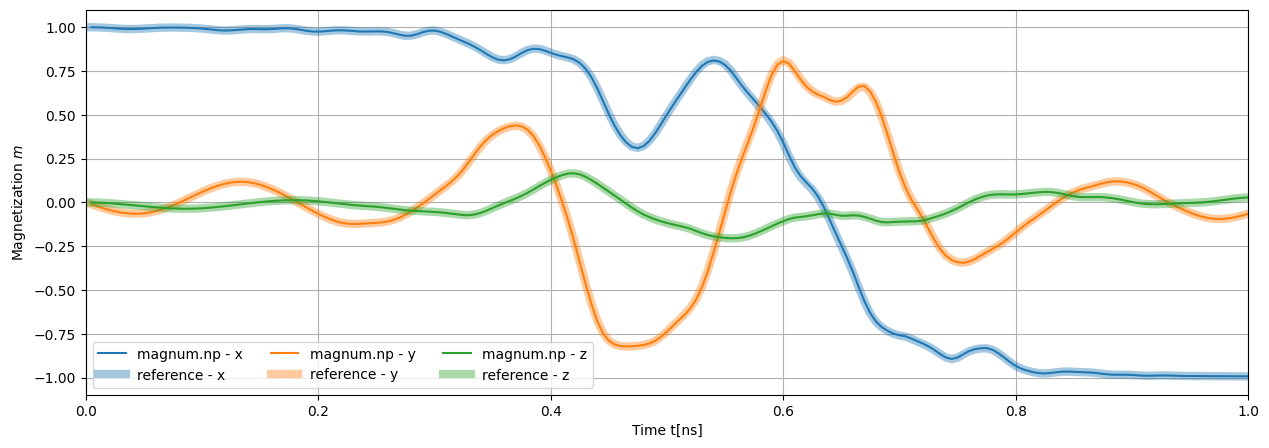

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/log.dat")
ref = np.load("ref/M_mx3_2.npy")
#ref = np.load("ref/M_oommf_2.npy") # OOMMF and mumax3 perfectly agree

fig, ax = plt.subplots(figsize=(15, 5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(data[:,0]*1e9, data[:,4], '-', color = cycle[0], label = "magnum.np - x")
ax.plot(ref[0]*1e9, ref[1], '-', color = cycle[0], linewidth = 6, alpha = 0.4, label = "reference - x")

ax.plot(data[:,0]*1e9, data[:,5], '-', color = cycle[1], label = "magnum.np - y")
ax.plot(ref[0]*1e9, ref[2], '-', color = cycle[1], linewidth = 6, alpha = 0.4, label = "reference - y")

ax.plot(data[:,0]*1e9, data[:,6], '-', color = cycle[2], label = "magnum.np - z")
ax.plot(ref[0]*1e9, ref[3], '-', color = cycle[2], linewidth = 6, alpha = 0.4, label = "reference - z")

ax.set_xlabel("Time t[ns]")
ax.set_ylabel("Magnetization $m$")
ax.set_xlim(0,1)
ax.legend(ncol=3)
ax.grid()
fig.savefig("data/results.png")